# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df_prevrenda = pd.read_csv('01.1 - Profissao- Cientista de Dados_M10_support material.csv')

In [70]:
df_prevrenda

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [62]:
df_prevrenda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [63]:
df1 = df_prevrenda[['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade', 'tempo_emprego',
              'qt_pessoas_residencia', 'renda']]
df_cor = df1.corr() # MATRIZ DE CORRELAÇÕES
df_cor

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.000000


In [65]:
df1['posse_de_veiculo1'] = pd.get_dummies(df1['posse_de_veiculo'],drop_first=True)
df1['posse_de_imovel1'] = pd.get_dummies(df1['posse_de_imovel'],drop_first=True)
df1 = df1[['posse_de_veiculo1','posse_de_imovel1', 'qtd_filhos', 'idade', 'tempo_emprego',
            'qt_pessoas_residencia', 'renda']]
df1 = df1.rename({'posse_de_veiculo1' : 'posse_de_veiculo', 'posse_de_imovel1': 'posse_de_imovel'}, axis=1)
df1


,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,1,1,36,3.575342,3.0,3369.24
1,1,1,0,42,0.860274,2.0,6096.14
2,1,1,2,31,8.065753,4.0,5658.98
3,1,0,0,50,1.208219,2.0,7246.69
4,0,0,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...
14995,1,1,1,37,2.046575,3.0,1193.29
14996,1,1,1,30,12.079452,3.0,2519.18
14997,1,1,0,40,2.161644,2.0,1586.85
14998,0,1,0,47,3.295890,2.0,6975.39


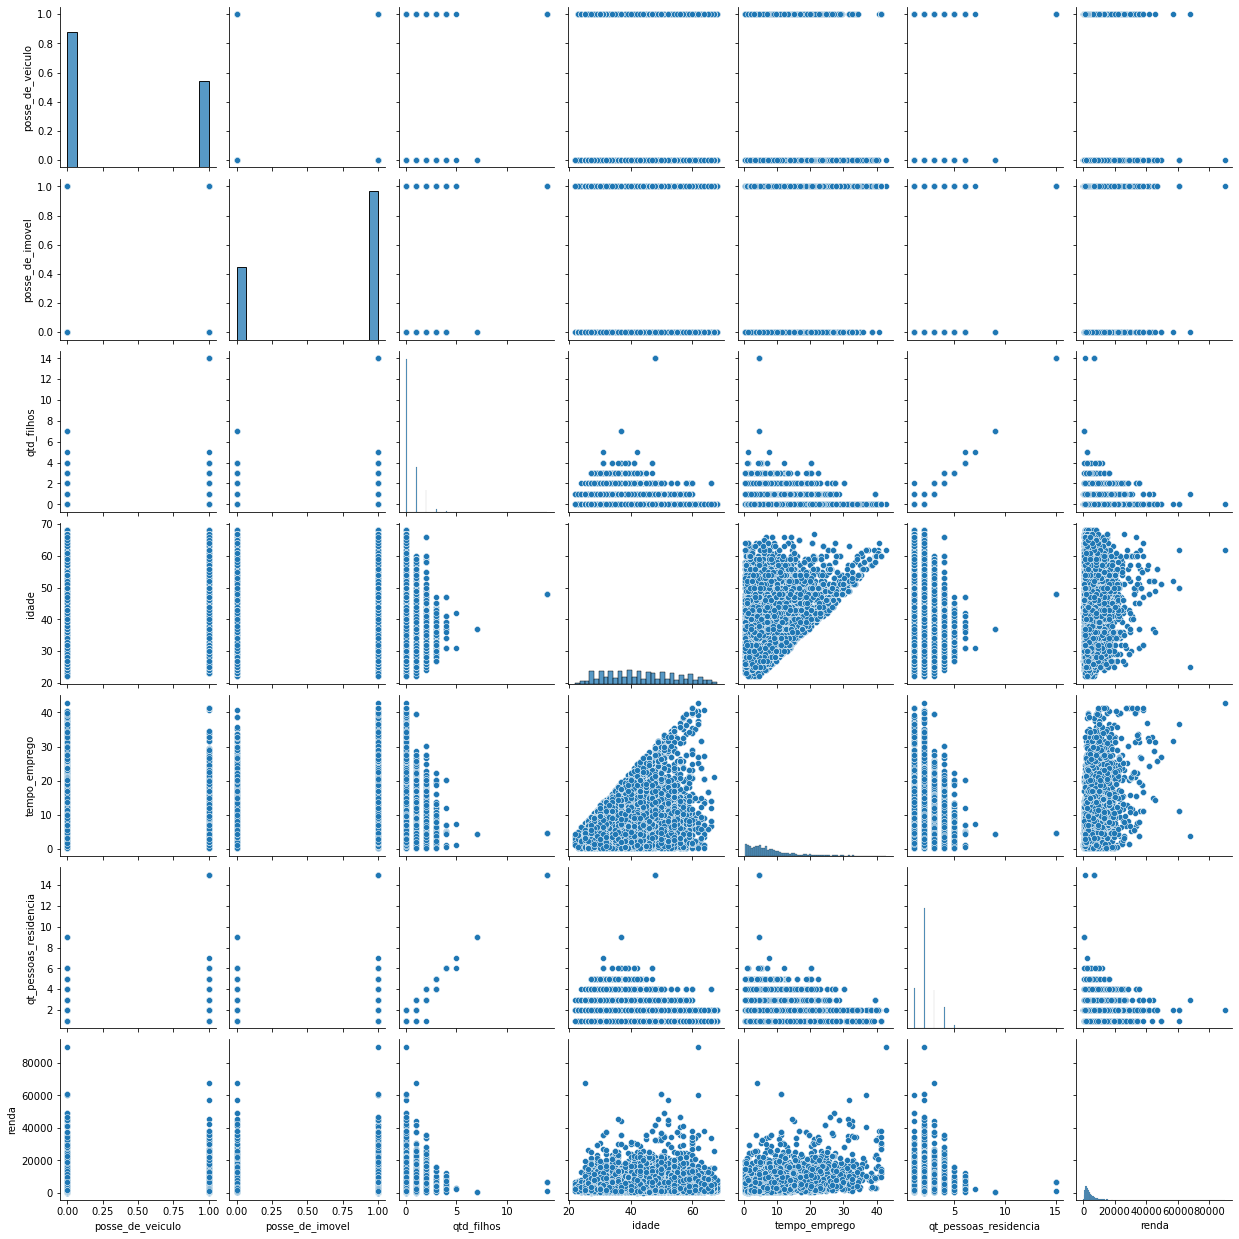

In [69]:
sns.pairplot(df1) # MATRIZ DE DISPERSÃO

**Análise**: Analisando a matriz de correlações, verifica-se que o número mais próximo de 1 se encontra no quadrante em que relaciona-se a quantidade de filhos e o quantidade de pessoas na residência (0.896488), contudo esta correlação não está propriamente correlacionada à renda. Como o foco é a análise do perfil de renda para os novos clientes, a melhor correlação seria entre a **renda e o tempo de emprego (correlação de 0.394235)**, sendo que na análise de dispersão existe uma concentração para até renda 20 mil em qualquer "x" de tempo de emprego, embora quanto maior o tempo de emprego mais disperso são os pontos de renda (maior renda). Também destaca-se a correlação entre a **renda e a quantidade de pessoas na residencia**, que apesar da correlação não ser das maiores 0.020977, a matriz de dispersão demonstra claramente que quanto menor quantidade de pessoas na residencia maior será a renda, sendo que está vai diminuindo na medida em que aumenta o número de residentes.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

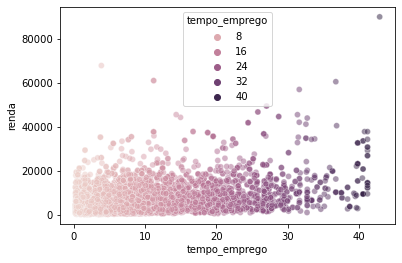

In [86]:
variável_1 = df1[['tempo_emprego', 'renda']]
sns.scatterplot(x = 'tempo_emprego'
                , y = 'renda'
                , data = variável_1
                , alpha = .5
                , hue = 'tempo_emprego'
                , legend = 'auto'
               )

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='renda'>

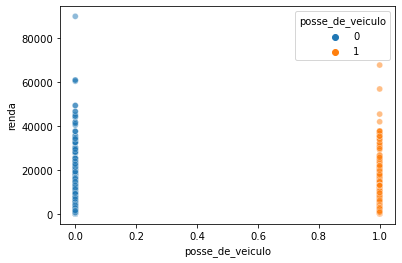

In [87]:
variável_2 = df1[['posse_de_veiculo', 'renda']]
sns.scatterplot(x = 'posse_de_veiculo'
                , y = 'renda'
                , data = variável_2
                , alpha = .5
                , hue = 'posse_de_veiculo'
                , legend = 'auto'
               )

**Analise**: De acordo com o grafico de dispersão das variáveis renda e tempo de serviço, pode-se concluir que estando a pessoa empregada é possível sempre conceder um crédito compatível para uma renda até 20 mil.Após 20 anos de tempo de serviço há uma maior dispersão, seja pelo fato da idade, estando mais estável, não necessite de muito financiamento e quando este se faz necessário costuma-se ser de valores mais altos.
Já o gráfico das variáveis posse de veículo e renda, demonstra que o fato de possuir veículo ou não, não representa grande alteração no perfil de renda, pois são muito semelhantes.

3) Na su aopinião, há outliers na variável renda?

Resposta: Acredito que haja sim outlier na variável renda, pois existe casos isolados onde uma pessoa tem uma renda acima de 80 mil e 60 mil. Como são poucos casos, acredito que o valor da renda seja mensal, pois caso fosse anual, deveria haver mais casos de rendas altas neste patamar.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [102]:
variável_1log = variável_1.copy()
variável_1log['log_renda'] = np.log(variável_1log['renda'])
variável_1log

,tempo_emprego,renda,log_renda
0,3.575342,3369.24,8.122442
1,0.860274,6096.14,8.715411
2,8.065753,5658.98,8.640999
3,1.208219,7246.69,8.888300
4,13.873973,4017.37,8.298383
...,...,...,...
14995,2.046575,1193.29,7.084469
14996,12.079452,2519.18,7.831689
14997,2.161644,1586.85,7.369506
14998,3.295890,6975.39,8.850144


<AxesSubplot:xlabel='tempo_emprego', ylabel='log_renda'>

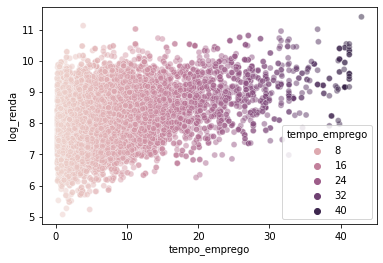

In [105]:
sns.scatterplot(x = 'tempo_emprego'
                , y = 'log_renda'
                , data = variável_1log
                , alpha = .5
                , hue = 'tempo_emprego'
                , legend = 'auto'
               ) 
# grafico de dispersão (scatterplot) das variáveis tempo de emprego e renda.

In [110]:
variável_1log.corr()

,tempo_emprego,renda,log_renda
tempo_emprego,1.000000,0.394235,0.379556
renda,0.394235,1.000000,0.835734
log_renda,0.379556,0.835734,1.000000


<AxesSubplot:xlabel='posse_de_veiculo', ylabel='log_renda'>

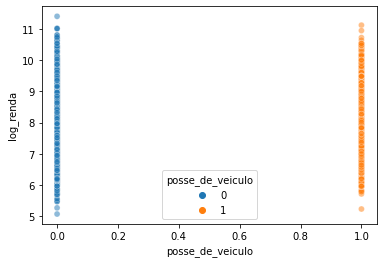

In [108]:
variável_2log = variável_2.copy()
variável_2log['log_renda'] = np.log(variável_2log['renda'])
sns.scatterplot(x = 'posse_de_veiculo'
                , y = 'log_renda'
                , data = variável_2log
                , alpha = .5
                , hue = 'posse_de_veiculo'
                , legend = 'auto'
               ) 
# grafico de dispersão (scatterplot) das variáveis posse de veículo e renda.

In [109]:
variável_2log.corr()

,posse_de_veiculo,renda,log_renda
posse_de_veiculo,1.000000,0.063414,0.090529
renda,0.063414,1.000000,0.835734
log_renda,0.090529,0.835734,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Resposta: No gráfico de dispersão entre renda e tempo de serviço, apesar do uso do LOG ter sanado a questão do outliers, concentrando os pontos do gráfico, entendo que a análise piorou visto que, além do LOG não mensurar de forma clara o valor da renda envolvido, no grafico de correlação, verifica-se que houve uma piora na correlação ao usar o log renda (log_renda com tempo_de_serviço:0.379556, enquanto que a correlação entre renda e tempo_de_serviço era: 0.394235)
Já no gráfico de dispersão entre renda e posse de veículo, o uso do log melhorou a análise, visto que além de melhorar o gráfico aproximando os pontos considerados como outliers, o índice de correlação entre a posse de veículo e o log_renda é melhor (0.090529) que a correlação entre posse_de_veículo e renda (0.063414).